## This notebook benchmarks to the results of the Namur et al. (2011) Supporting Spreadsheet

In [1]:
import numpy as np
import pandas as pd
import Thermobar as pt
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
import warnings as w
pd.options.display.max_columns = None

In [2]:
In=pt.import_excel('Namur_2011_Supplement.xlsx', sheet_name='Thermobar_input', suffix="_Liq")
my_input=In['my_input']
Liqs=In['Liqs']
Liqs.head()

,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,Cr2O3_Liq,P2O5_Liq,H2O_Liq,Fe3Fet_Liq,NiO_Liq,CoO_Liq,CO2_Liq,Sample_ID_Liq
0,46.42000,4.410000,12.430000,15.500000,0.0,4.710000,10.220000,3.220000,0.7000,0.0,0.600000,0.0,0.0,0.0,0.0,0.0,Mafic
1,46.70097,5.238199,12.465937,15.894384,0.0,4.882248,10.359445,4.028982,1.0638,0.0,0.910382,0.0,0.0,0.0,0.0,0.0,Mafic
2,46.70097,5.238199,12.465937,15.894384,0.0,4.882248,10.359445,5.000000,1.0638,0.0,0.910382,0.0,0.0,0.0,0.0,0.0,Mafic
3,46.70097,5.238199,12.465937,15.894384,0.0,4.882248,10.359445,5.000000,0.0000,0.0,0.910382,0.0,0.0,0.0,0.0,0.0,Mafic
4,48.24000,3.590000,16.450000,10.630000,0.0,6.130000,9.960000,3.590000,1.4300,0.0,0.490000,0.0,0.0,0.0,0.0,0.0,Alk-rich Mafic


In [3]:
Calc_An=pt.calculate_An_Namur2011(liq_comps=Liqs, T=my_input['T'])
Calc_An.head()

,An_Eq_Thermo_eq31,An_Eq_best_non-thermo_choice,Selected non-thermo model,An_Eq_Mafic_Ultramafic_eq33,An_Eq_Alk_Mafic_Ultramafic_eq34,An_Eq_Int_Fels_eq35
0,0.579680,0.600866,Maf_Ultra,0.600866,0.527641,0.535593
1,0.556010,0.453945,Alk_Maf_Ultra,0.528965,0.453945,0.511007
2,0.530637,0.390591,Alk_Maf_Ultra,0.480236,0.390591,0.489641
3,0.526274,0.389940,Alk_Maf_Ultra,0.502054,0.389940,0.490625
4,0.651229,0.725689,Alk_Maf_Ultra,0.656961,0.725689,0.620265


### Benchmarking the thermodynamic expression

Text(0, 0.5, 'Calc An Namur Supplement')

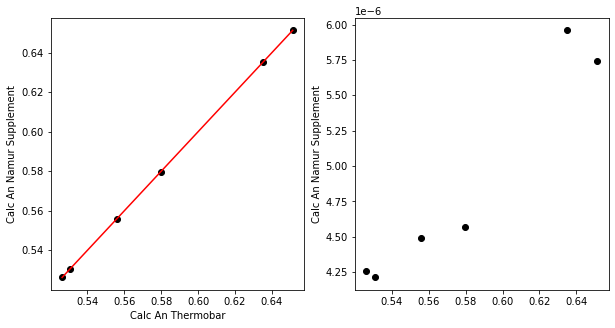

In [4]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.plot(Calc_An['An_Eq_Thermo_eq31'], my_input['Calc_An_Thermo'], 'ok')
ax1.plot([min(Calc_An['An_Eq_Thermo_eq31']),  max(Calc_An['An_Eq_Thermo_eq31'])],
        [min(Calc_An['An_Eq_Thermo_eq31']),  max(Calc_An['An_Eq_Thermo_eq31'])],
        '-r')
ax1.set_xlabel('Calc An Thermobar')
ax1.set_ylabel('Calc An Namur Supplement')
ax2.plot(Calc_An['An_Eq_Thermo_eq31'], Calc_An['An_Eq_Thermo_eq31']-my_input['Calc_An_Thermo'], 'ok')
ax2.set_ylabel('Calc An Thermobar - Namur Suppelement')
ax2.set_ylabel('Calc An Namur Supplement')

### Benchmarking the Mafic-Ultramafic expression

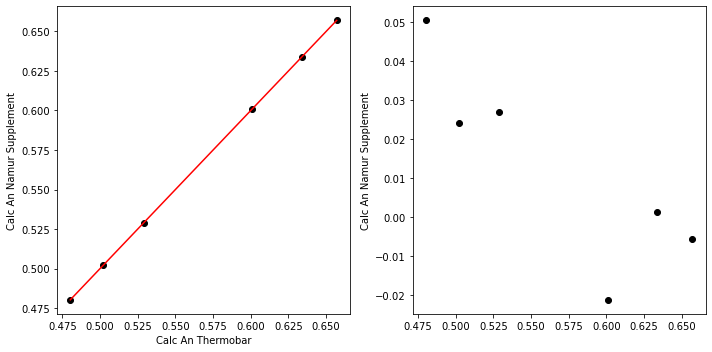

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.plot(Calc_An['An_Eq_Mafic_Ultramafic_eq33'], my_input['Calc_An_Mafic'], 'ok')
ax1.plot([min(Calc_An['An_Eq_Mafic_Ultramafic_eq33']),  max(Calc_An['An_Eq_Mafic_Ultramafic_eq33'])],
        [min(Calc_An['An_Eq_Mafic_Ultramafic_eq33']),  max(Calc_An['An_Eq_Mafic_Ultramafic_eq33'])],
        '-r')
ax1.set_xlabel('Calc An Thermobar')
ax1.set_ylabel('Calc An Namur Supplement')
ax2.plot(Calc_An['An_Eq_Mafic_Ultramafic_eq33'], Calc_An['An_Eq_Mafic_Ultramafic_eq33']-my_input['Calc_An_Mafic'], 'ok')
ax2.set_ylabel('Calc An Thermobar - Namur Suppelement')
ax2.set_ylabel('Calc An Namur Supplement')
fig.tight_layout()

### Benchmarking the alkaline mafic-ultrAn_Eq_Alk_Mafic_Ultramafic_eq34amafic expression

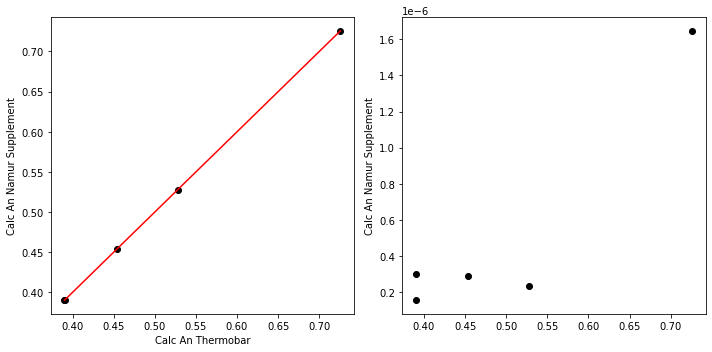

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.plot(Calc_An['An_Eq_Alk_Mafic_Ultramafic_eq34'], my_input['Calc_An_Alk_rich'], 'ok')
ax1.plot([min(Calc_An['An_Eq_Alk_Mafic_Ultramafic_eq34']),  max(Calc_An['An_Eq_Alk_Mafic_Ultramafic_eq34'])],
        [min(Calc_An['An_Eq_Alk_Mafic_Ultramafic_eq34']),  max(Calc_An['An_Eq_Alk_Mafic_Ultramafic_eq34'])],
        '-r')
ax1.set_xlabel('Calc An Thermobar')
ax1.set_ylabel('Calc An Namur Supplement')
ax2.plot(Calc_An['An_Eq_Alk_Mafic_Ultramafic_eq34'], 
         Calc_An['An_Eq_Alk_Mafic_Ultramafic_eq34']-my_input['Calc_An_Alk_rich'], 'ok')
ax2.set_ylabel('Calc An Thermobar - Namur Suppelement')
ax2.set_ylabel('Calc An Namur Supplement')
fig.tight_layout()

### Benchmarking the silicic expression

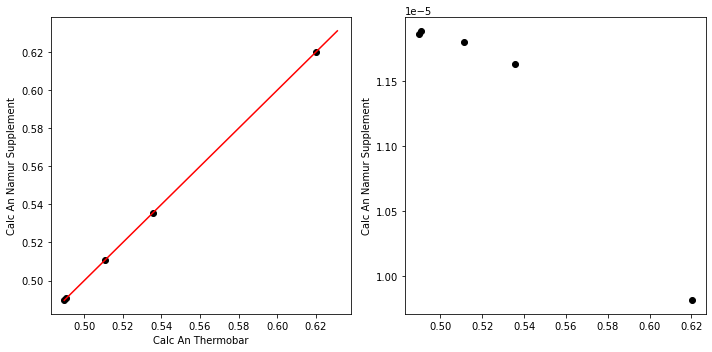

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.plot(Calc_An['An_Eq_Int_Fels_eq35'], my_input['Calc_An_IF'], 'ok')
ax1.plot([min(Calc_An['An_Eq_Int_Fels_eq35']),  max(Calc_An['An_Eq_Int_Fels_eq35'])],
        [min(Calc_An['An_Eq_Int_Fels_eq35']),  max(Calc_An['An_Eq_Int_Fels_eq35'])],
        '-r')
ax1.set_xlabel('Calc An Thermobar')
ax1.set_ylabel('Calc An Namur Supplement')
ax2.plot(Calc_An['An_Eq_Int_Fels_eq35'], 
         Calc_An['An_Eq_Int_Fels_eq35']-my_input['Calc_An_IF'], 'ok')
ax2.set_ylabel('Calc An Thermobar - Namur Suppelement')
ax2.set_ylabel('Calc An Namur Supplement')
fig.tight_layout()